In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
import dask
from pathlib import Path
from dask import dataframe
from dask_ml.preprocessing import OneHotEncoder

In [34]:
path = Path('./data/nycflights')
dfs = [dataframe.read_csv(csv) for csv in path.glob('*.csv')]
df = dataframe.concat(dfs)

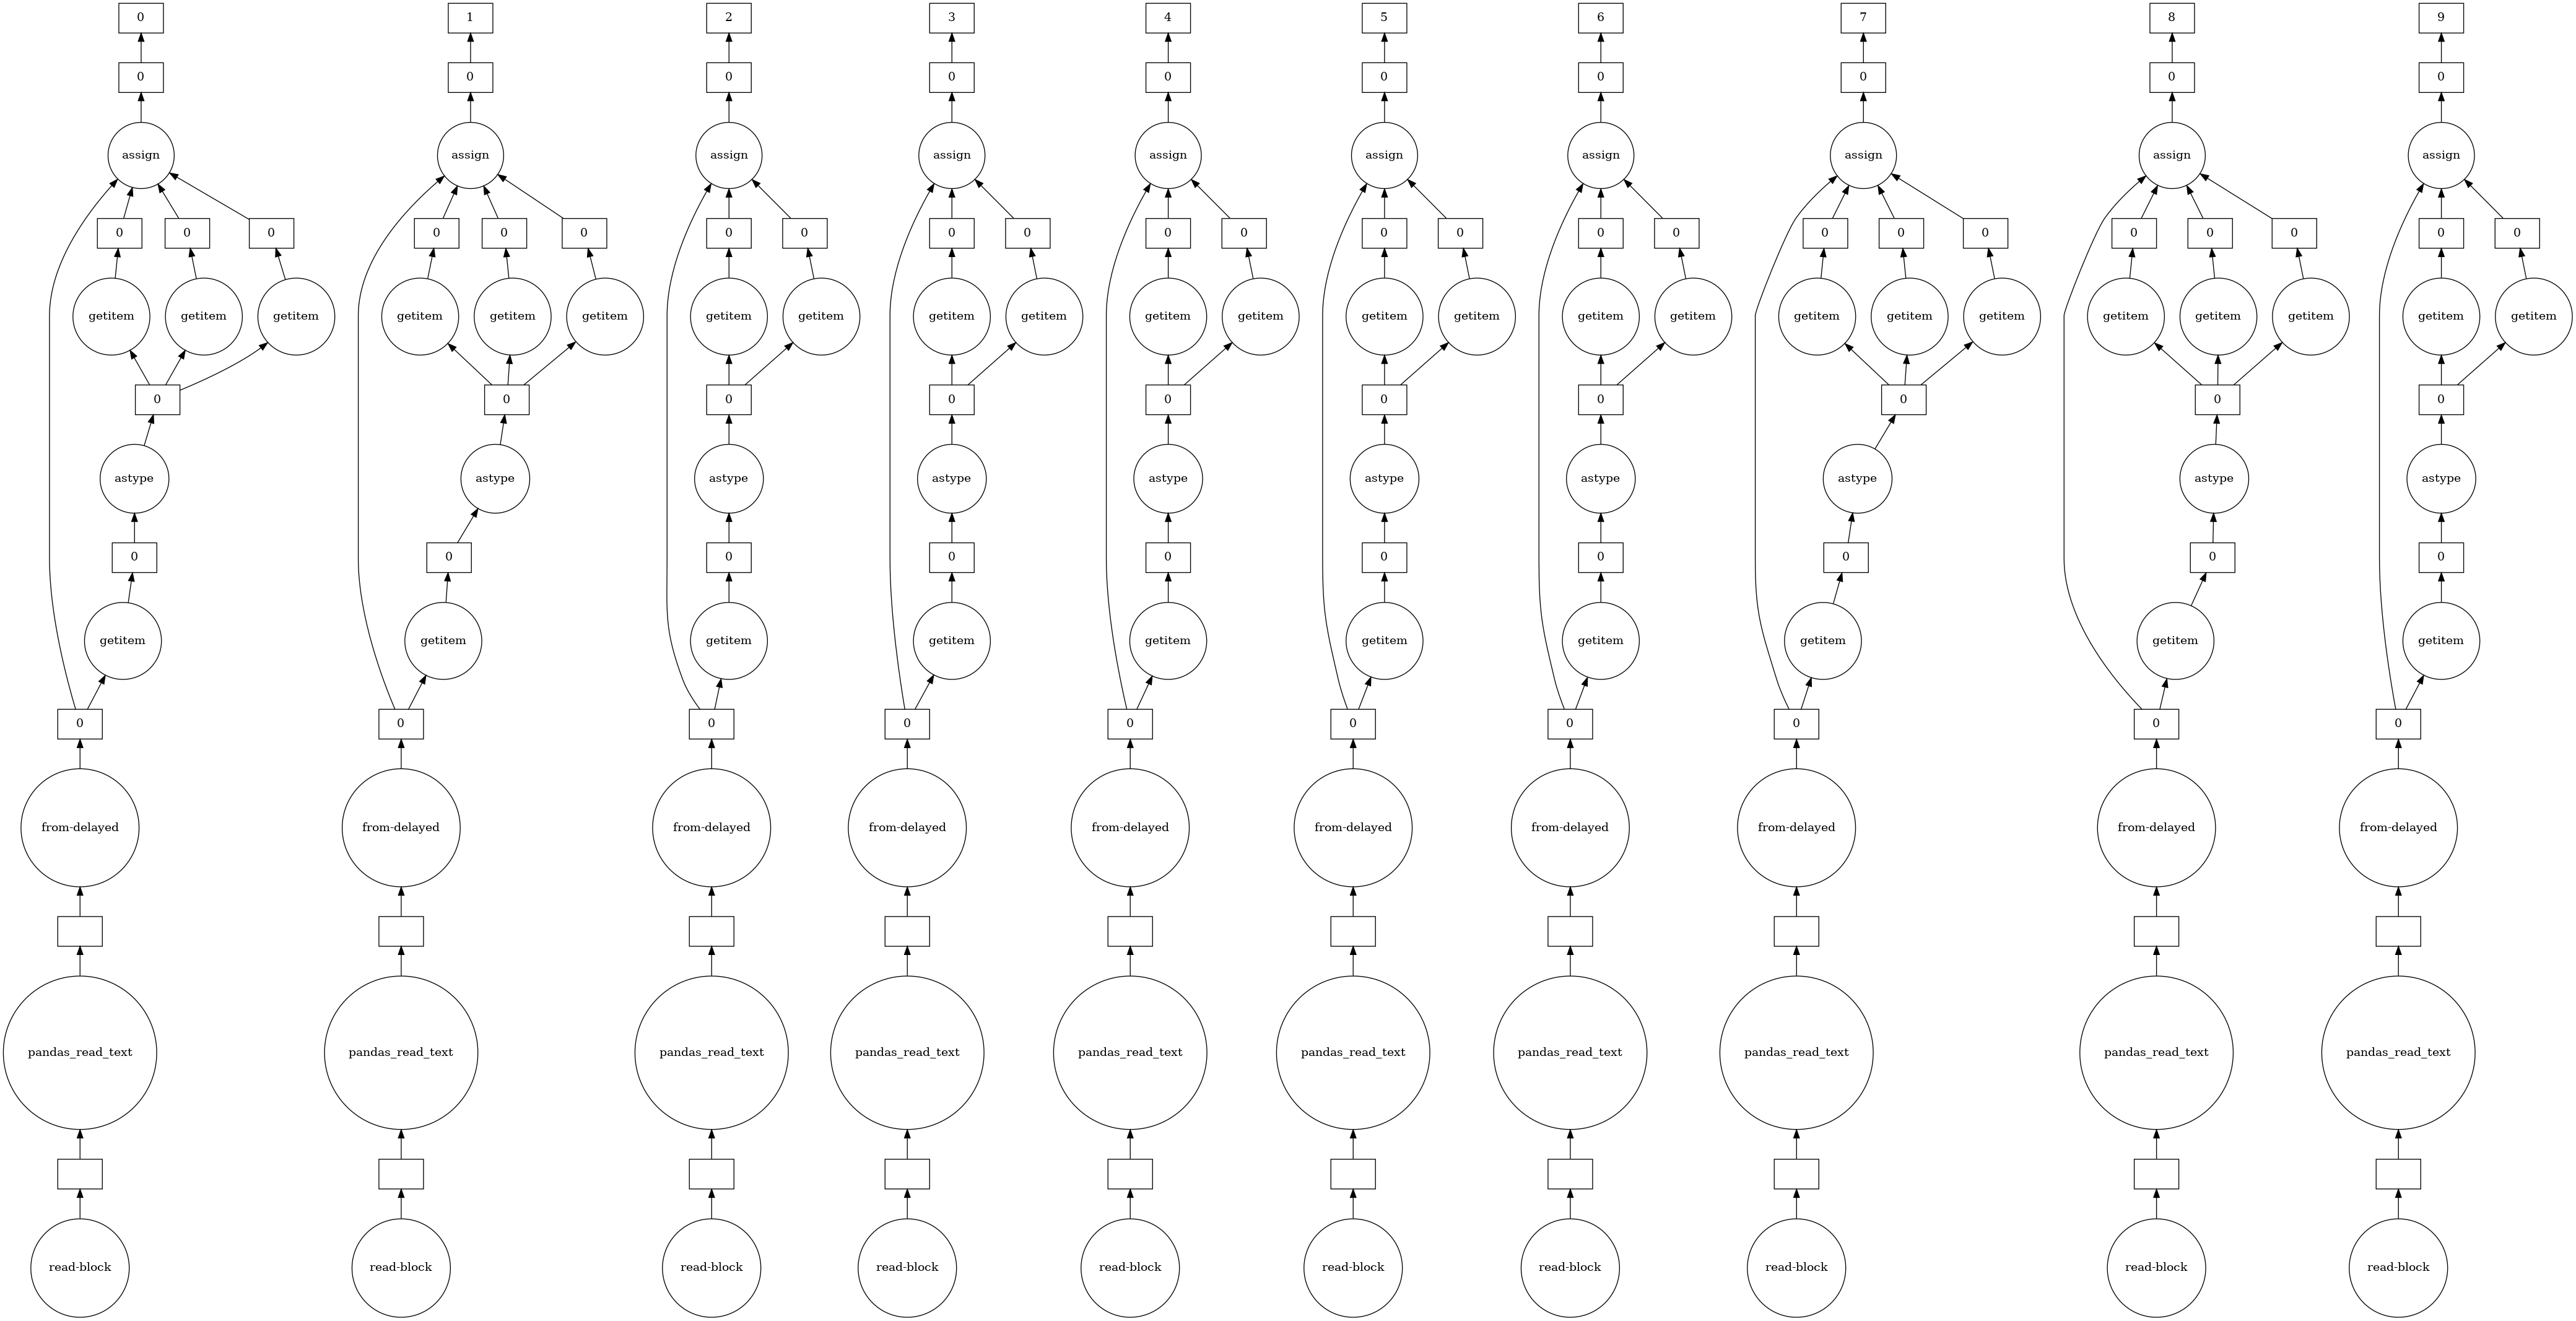

In [35]:
dask.visualize(df)

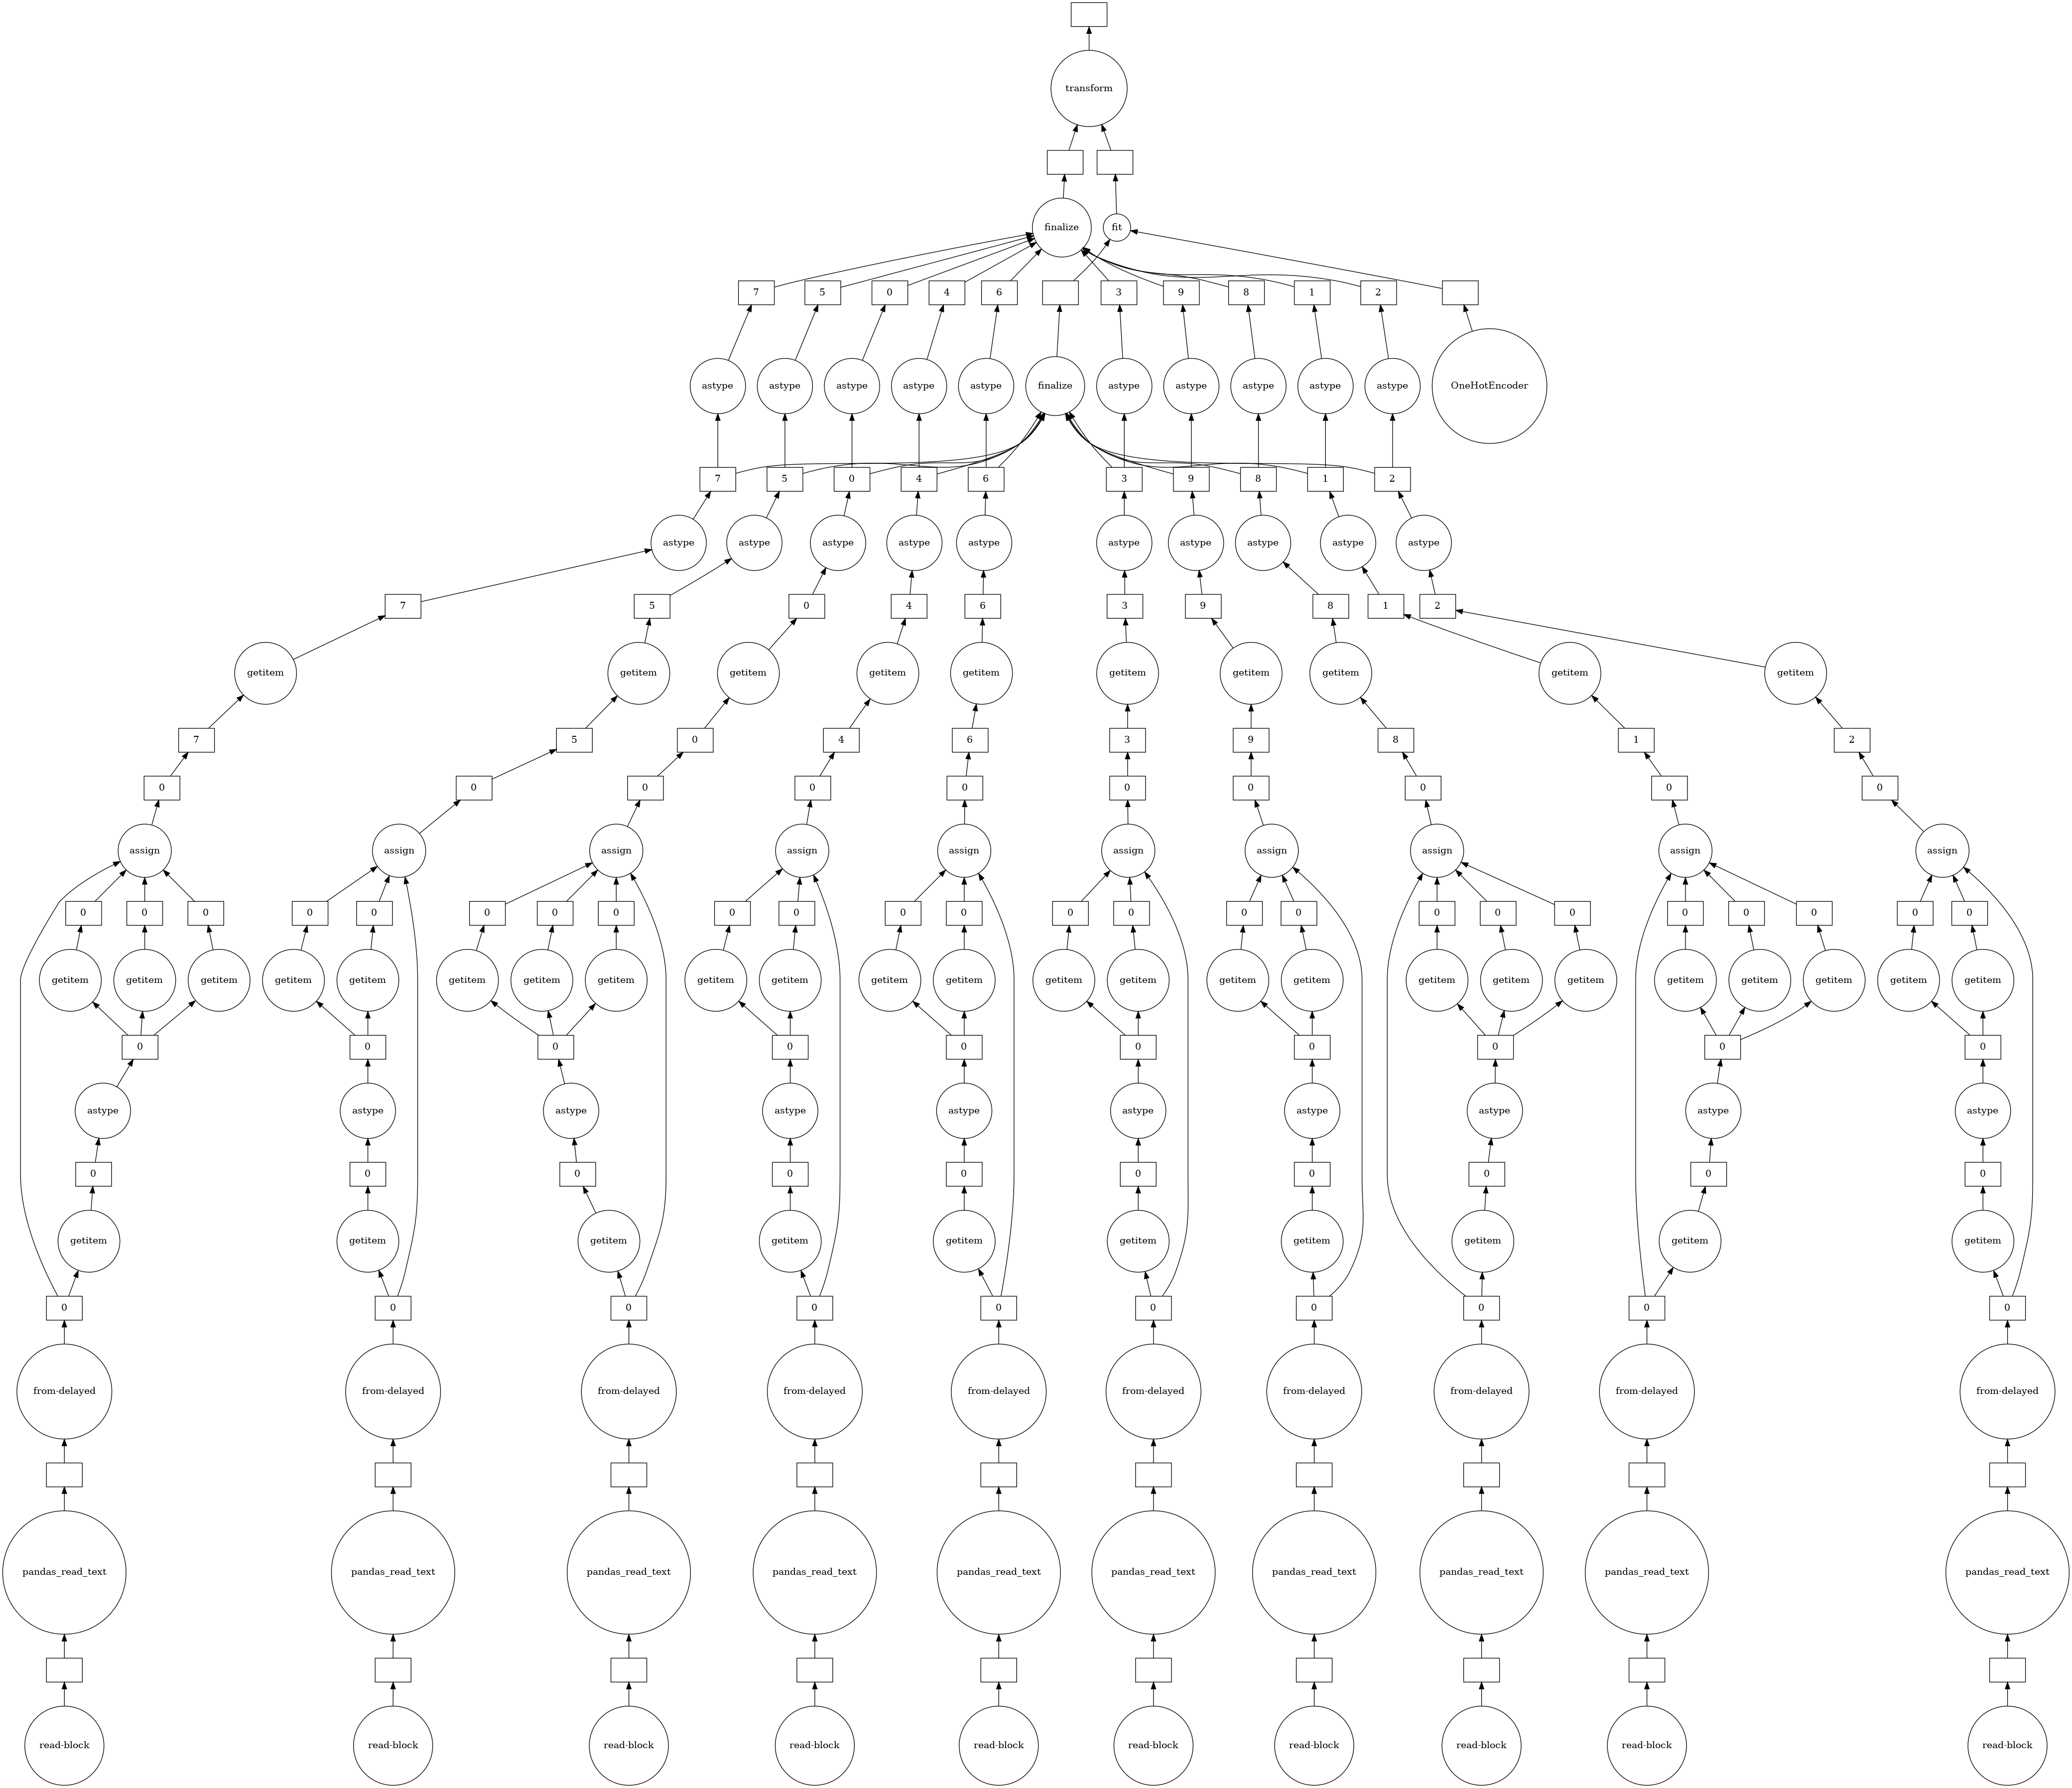

In [88]:
from dask import delayed
from dask_ml.preprocessing import LabelEncoder

series = df[['DayofMonth']]
series = series.astype('category')
series2 = series.astype('category')
ohe = delayed(OneHotEncoder)().fit(series).transform(series2)

In [95]:
type(df), type(ohe.values.compute)

(dask.dataframe.core.DataFrame, method)

In [ ]:
ohe.compute()

In [77]:
from dask import array

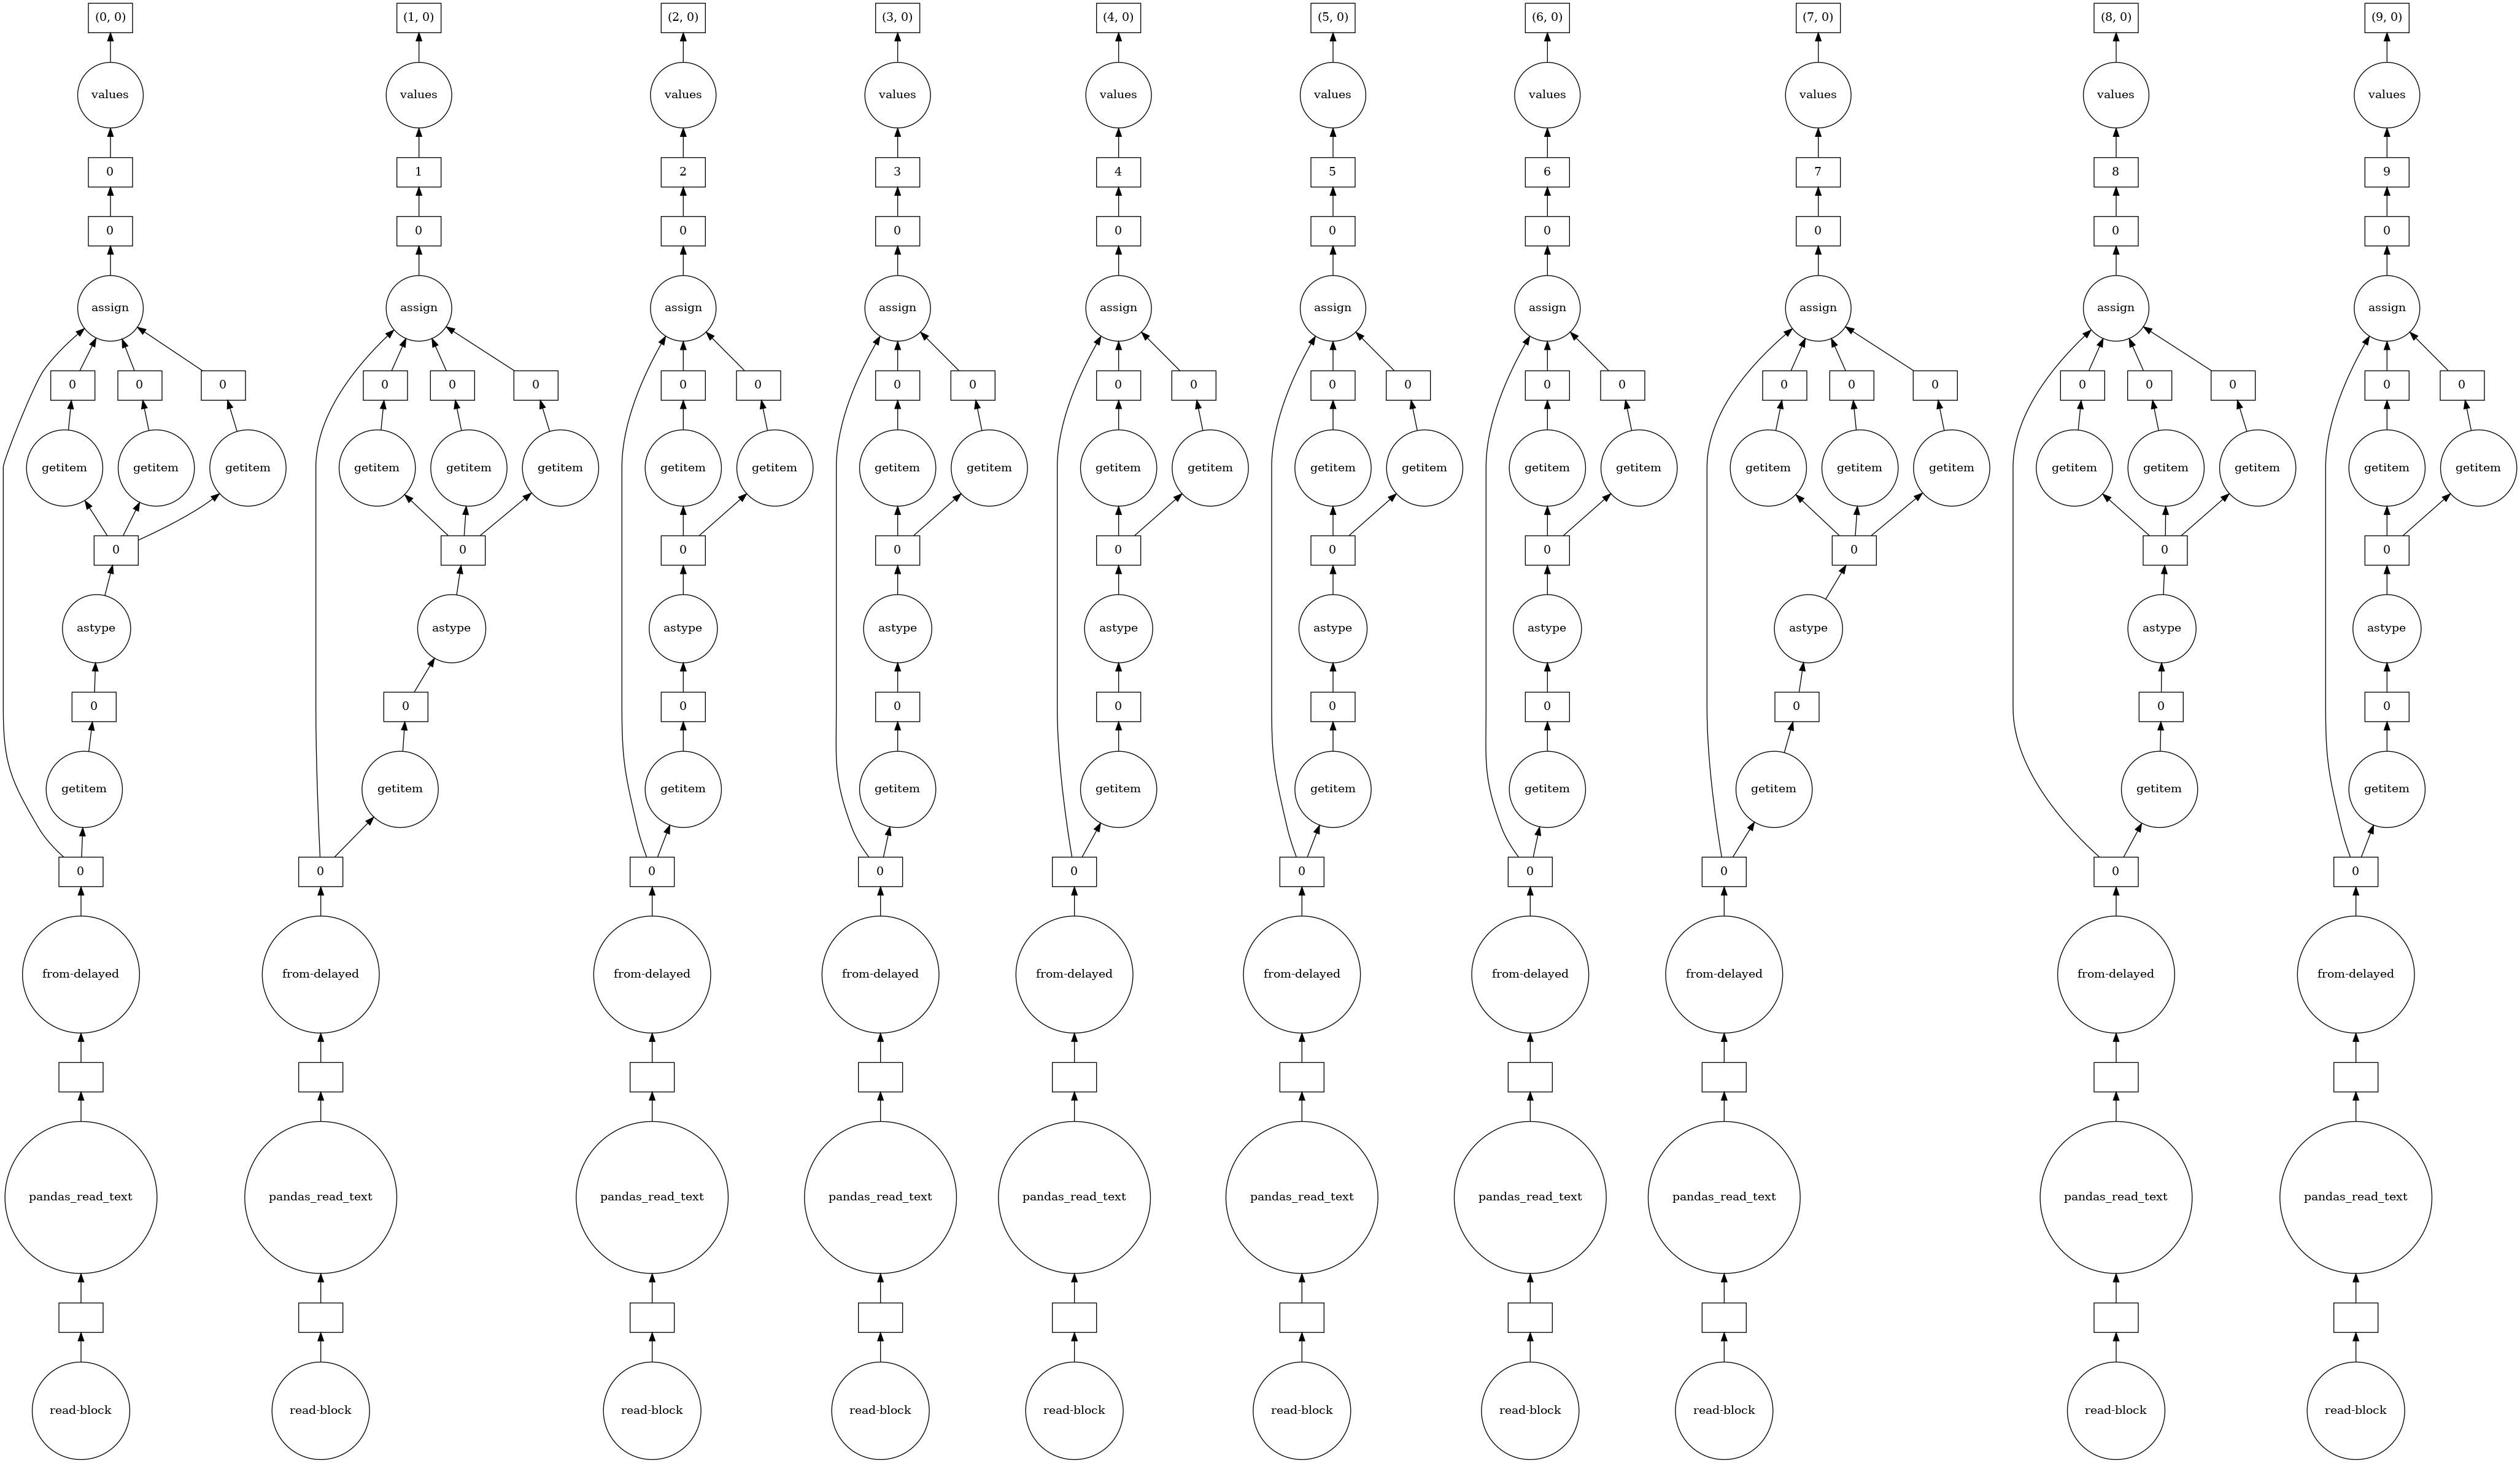

In [83]:

array.concatenate

In [87]:
from ml import DataframeToXy

df_to_xy = DataframeToXy(df, dataframe, delayed(OneHotEncoder))
X, y = df_to_xy.transform(df)

X.visualize()

ValueError: zero-dimensional arrays cannot be concatenated

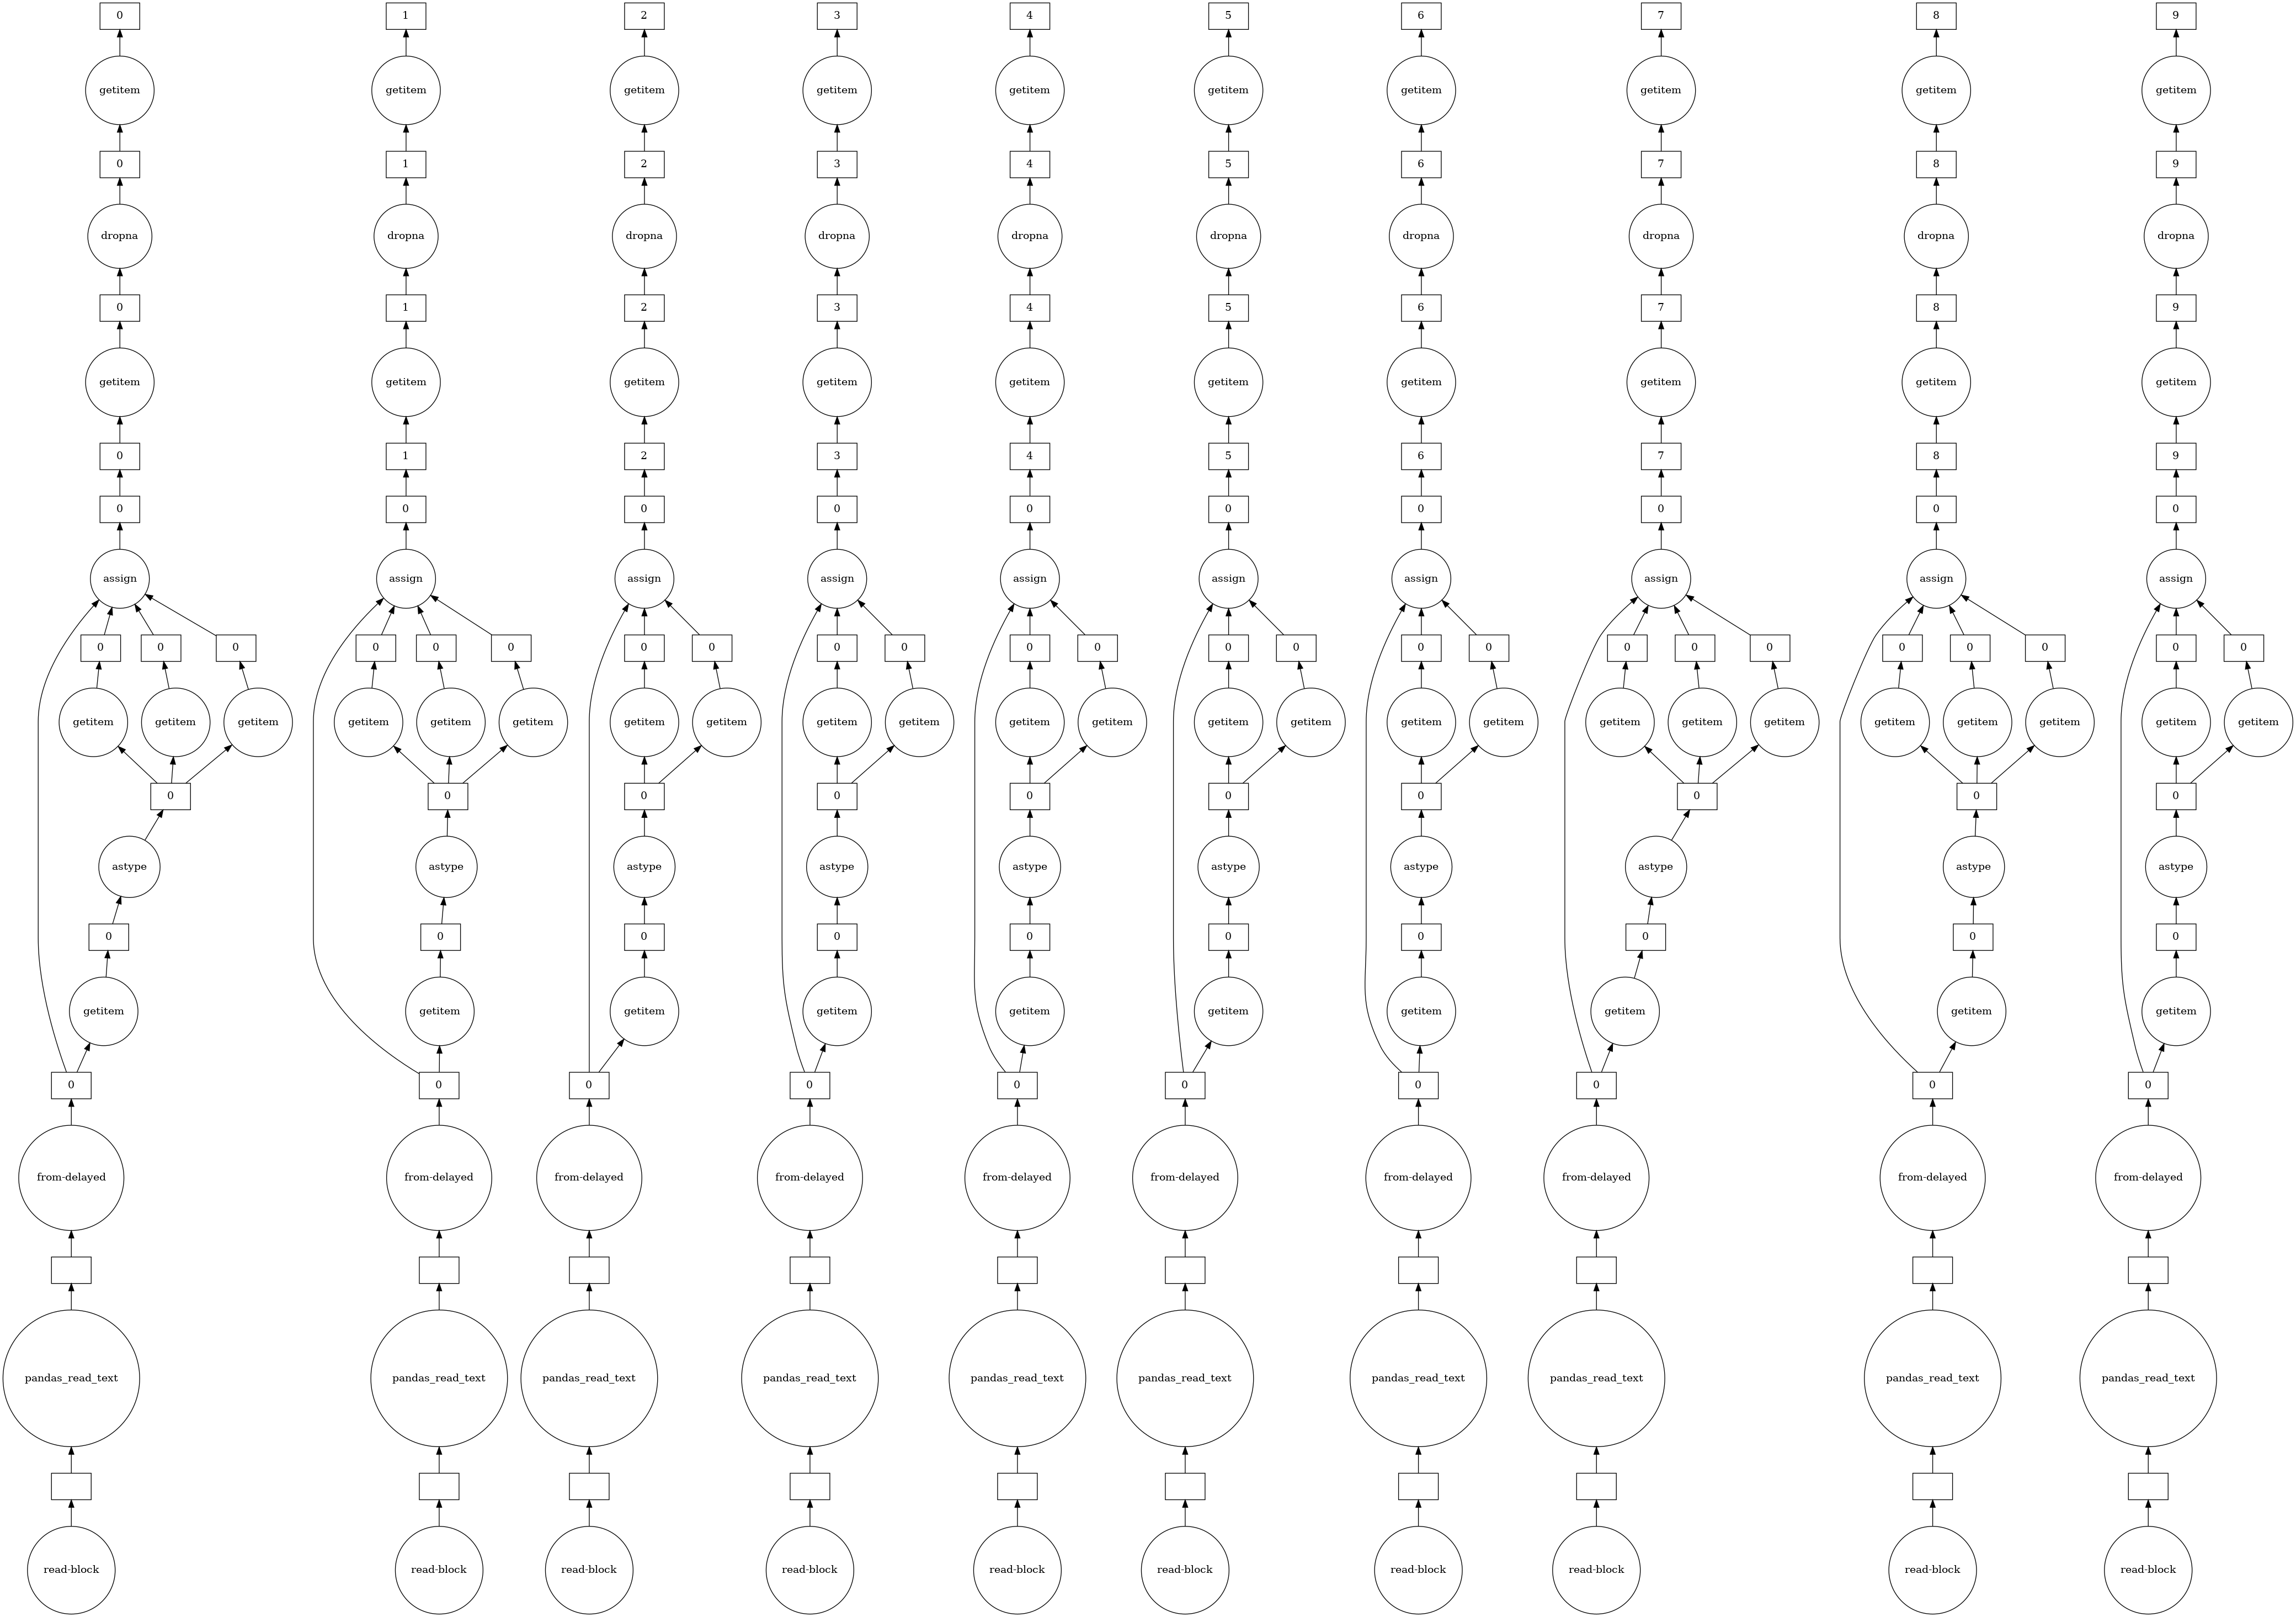

In [74]:
y.visualize()

In [75]:
X.compute()

AttributeError: 'list' object has no attribute 'compute'

In [ ]:
y.compute()

In [ ]:
print(df)
# df.columns

In [97]:
from dask_ml.model_selection import GridSearchCV
from dask_ml.xgboost import XGBRegressor

In [100]:
import numpy as np

param_grid = {
    'learning_rate': [0.05, 0.1, 0.5],
    'n_estimators': 2 ** np.arange(6, 11),
    'subsample': [0.5, 0.75, 1.],
    'min_samples_leaf': 2 ** np.arange(1, 4),
    'max_depth': [2, 3, 5],
    'max_features': ['sqrt', 'log2'],
}

regressor = XGBRegressor()
grid_search = GridSearchCV(
    estimator=regressor,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    n_jobs=24,
    # verbose=1,
)

In [102]:
df_to_xy = DataframeToXy()
X_train, y_train = df_to_xy.transform(df)

In [ ]:
from dask.distributed import LocalCluster, Client

with LocalCluster(n_workers=4, threads_per_worker=1) as cluster:
    with Client(cluster) as client:
        grid_search.fit(X_train, y_train)
        print(grid_search)
        print(grid_search.best_params_)
        print(grid_search.best_score_)

('xgbregressor-fit-score-e96276c43ad00550754a7b647f0d14b9', 0, 0) has failed... retrying
('xgbregressor-fit-score-e96276c43ad00550754a7b647f0d14b9', 0, 2) has failed... retrying
('xgbregressor-fit-score-e96276c43ad00550754a7b647f0d14b9', 1, 1) has failed... retrying
('xgbregressor-fit-score-e96276c43ad00550754a7b647f0d14b9', 2, 1) has failed... retrying
('xgbregressor-fit-score-e96276c43ad00550754a7b647f0d14b9', 1, 0) has failed... retrying
('xgbregressor-fit-score-e96276c43ad00550754a7b647f0d14b9', 2, 2) has failed... retrying
('xgbregressor-fit-score-e96276c43ad00550754a7b647f0d14b9', 3, 1) has failed... retrying
('xgbregressor-fit-score-e96276c43ad00550754a7b647f0d14b9', 4, 0) has failed... retrying
('xgbregressor-fit-score-e96276c43ad00550754a7b647f0d14b9', 5, 0) has failed... retrying
('xgbregressor-fit-score-e96276c43ad00550754a7b647f0d14b9', 7, 2) has failed... retrying
('xgbregressor-fit-score-e96276c43ad00550754a7b647f0d14b9', 8, 2) has failed... retrying
('xgbregressor-fit-sc

In [ ]:
predicted = grid_search.predict(X_test)
print(((predicted - y_test)**2).mean())

